In [46]:
from sage.all import Set, Integer
from sage.all import Set as SageSet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.datasets import make_swiss_roll

In [47]:
"""
Set: collection of distinct objects
    - order does not matter
    - repition is ignored (frequency of elements does not matter)
    - two sets are equal if and only if they have the same elements

set operations: union, intersection, difference, cartesian products

Preserving structure: under any transformation or mapping, the unique identity and memebership of the elments remain intact
    - preservation of individuality: each element in a set is unique and doesn't lose it's identity when placed in a set
    - uniquness is preserved even when the set undergoes transformations such as bijections, injections, or surjections
    - every element either belongs to or does not belong to a given set
    - memership remains intact under union, intersections, and complements
    
"""

"\nSet: collection of distinct objects\n    - order does not matter\n    - repition is ignored (frequency of elements does not matter)\n    - two sets are equal if and only if they have the same elements\n\nset operations: union, intersection, difference, cartesian products\n\nPreserving structure: under any transformation or mapping, the unique identity and memebership of the elments remain intact\n    - preservation of individuality: each element in a set is unique and doesn't lose it's identity when placed in a set\n    - uniquness is preserved even when the set undergoes transformations such as bijections, injections, or surjections\n    - every element either belongs to or does not belong to a given set\n    - memership remains intact under union, intersections, and complements\n    \n"

In [48]:
# union_sets
def union_set(set_a, set_b):
    """
    method for creating a new set that is the union of the two input sets
    parameters:
        - set_a, set_b: sets containing elements
    return: a new set that is the union of set_a and set_b, where it preserves the invariance that each element is unique

    uses built-in set union operator | to combine both sets
    """
    new_set = set_a | set_b
    return new_set

In [49]:
def remove_duplicates(data):
    """
    remove duplicate rows to preserve the property of uniqueness
    parameters:
        - data: a numpy array of shape (n_samples, n_features) where samples represent the number of data elements and 
                features represent the number of components each data has
    returns a numpy array with duplicate rows removed
    """

    # covert each row to a tuple so that they can be added to a python set, where the conversion ensures the duplictae rows are removed
    data_as_tuple = map(tuple, data) # each row or data point is converted to a tuple, where map function maps or represents each data point as tuple
    unique_data_set = set(data_as_tuple) # repetitive rows are removed
    unique_data = np.array(list(unique_data_set)) # convert the set back into numpy array 
    return unique_data

In [50]:
# demonstrating set operations on Swiss Roll Dataset
n_samples = 1500 # individual data points in the dataset
noies = 0.05 # random variations added to the data points

data, _ = make_swiss_roll(n_samples=n_samples, noise=noies) # captures (n_samples, 3) array data and ignores additional data that maybe 2d often used for coloring or other information


In [51]:
print(data.shape[0])

1500


In [52]:
# intentionally duplicte a subset of data points to introduce redundancy
# data,shape returns the shape of the data, where 0th index is the size of the data and returns the number of rows
# range(data.shape[0], size) generates numbers from 0 to size or number of rows-1 which are the indicies of the data points and size refers to number of indicies to choose
# np.random.choice(..): selects random indicies and by setting replace to False it ensures that each index is unique where no index is selcted more than once
duplicate_indicies =  np.random.choice(range(data.shape[0]), size=int(0.1*n_samples), replace=False)
duplicates = data[duplicate_indicies] # extracts specific rows from the data based on the random values of the indicies stored in duplicate_indicies

data_with_duplicates = np.concatenate((data, duplicates), axis=0) # data: original data, duplicates: duplicated data, axis=0, concatenates or adds the duplicated data as rows



In [53]:
# conver the numpy array of data into a DataFrame where each column is respectively assigned as X, Y, Z making it easier to inspect or analyze
df_before = pd.DataFrame(data_with_duplicates, columns=['X', 'Y', 'Z']) # data with assigned column names

# apply remove_duplicate function to remove duplicates from df_before
data_unique = remove_duplicates(data_with_duplicates)
data_after = pd.DataFrame(data_unique, columns=['X', 'Y', 'Z']) # new data frame with duplicates removed

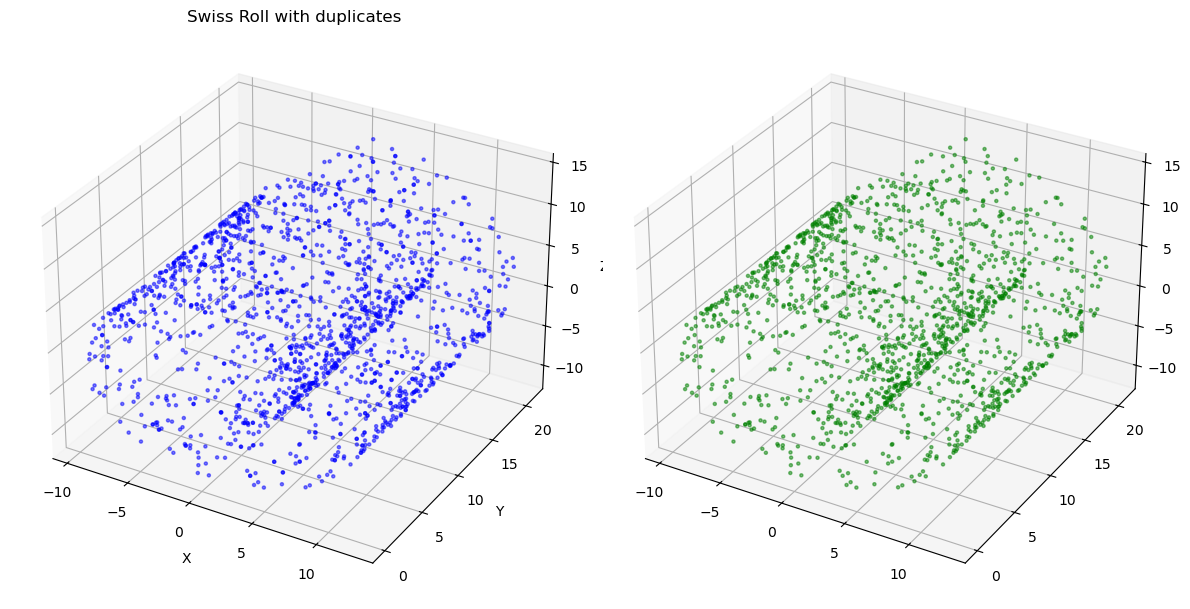

In [54]:
# visualization of before and after removing duplicates in data
# fig: a figure object that serves as a container for visualizing, figure() creates a blank canvas and figsize sets the dimesnions of the figure 
# figure reserves moemory for empty figure and can hold multiple subplots with customizations
fig = plt.figure(figsize=(12, 6))


# add_subplot creates and adds a plot inside the figure with position of the subplot and projection
# position (rows, columns, position) a shorthand for grid layout
ax1 = fig.add_subplot(121, projection='3d')

# scatter: creates a scatter plot inside the respective subplot using the coordinates from the give data and represents each data as point
ax1.scatter(df_before['X'], df_before['Y'], df_before['Z'], c='blue', s=5, alpha=0.5) # c: color, s: size, appha: transparency

ax1.set_title("Swiss Roll with duplicates") # set the title of the plot
# x, y, z labels for the plot
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data_after['X'], data_after['Y'], data_after['Z'], c='green', s=5, alpha=0.5)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

plt.tight_layout() # adjusts spacing by preventing overlapping labels
plt.show()


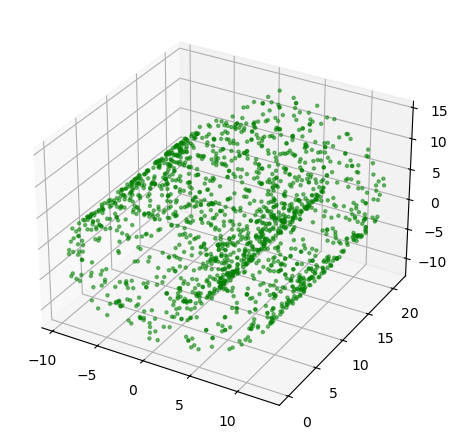

In [55]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df_before['X'], df_before['Y'], df_before['Z'], c='green', s = 5, alpha=0.5)